In [103]:
# import statements
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.integrate import solve_ivp
from scipy.optimize import brentq

import seaborn as sns

In [18]:
# define closed SIR model
def closed_SIR_model(t, p, beta, gamma): # p is total population, encoded as (S, I, R)
    return [-beta * p[0] * p[1], 
            beta * p[0] * p[1] - gamma * p[1], 
            gamma*p[1] ]

# run the closed SIR model and return the solution
def run_closed_SIR(N = 2000, beta = 1e-4, gamma = 0.05, dt = 1, span = 2000):
    I0, S0, R0 = 1, N - 1, 0 # define initial population parameters

    t_range = np.arange(0, span + 1, dt)
    t_span = [t_range[0], t_range[-1]]

    soln = solve_ivp(closed_SIR_model, t_span, [S0, I0, R0], args = (beta, gamma), t_eval = t_range)
    return soln

In [19]:
# define open SIR model
def open_SIR_model(t, p, beta, gamma, mu): # p = (S, I, R), N is total population size (S + I + R = N)
    S, I, R = p
    N = S + I + R

    ''' This function returns the three differential equations that describe our open SIR model.
    '''
    return [mu * N - beta * S * I - mu * S, beta * S * I - gamma * I - mu * I, gamma * I - mu * R] 

def run_open_SIR(N = 2000, beta = 1e-4, gamma = 0.05, mu = 5e-3, dt = 1, span = 2000):
    I0, S0, R0 = 1, N - 1, 0 # define initial population parameters

    t_range = np.arange(0, span + 1, dt) # define interval in which to evaluate the model, beginning from 0
    t_span = [t_range[0], t_range[-1]]

    soln = solve_ivp(open_SIR_model, t_span, [S0, I0, R0], args = (beta, gamma, mu), t_eval = t_range)
    return soln

In [187]:
# open SIR model with the inclusion of temporary immunity
def open_SIR_temp_immunity(t, p, beta, gamma, mu, sigma): # p = (S, I, R), N is total population size (S + I + R = N)
    S, I, R = p
    N = S + I + R

    ''' This function returns the three differential equations that describe our open SIR model.
    '''
    return [mu * N - beta * S * I - mu * S + sigma*R, beta * S * I - gamma * I - mu * I, gamma * I - mu * R - sigma * R] 

def run_open_SIR_temp_immunity(N = 2000, beta = 1e-4, gamma = 0.05, mu = 5e-3, sigma = 0.05, dt = 1, span = 2000):
    I0, S0, R0 = 1, N - 1, 0 # define initial population parameters

    t_range = np.arange(0, span + 1, dt) # define interval in which to evaluate the model, beginning from 0
    t_span = [t_range[0], t_range[-1]]

    soln = solve_ivp(open_SIR_temp_immunity, t_span, [S0, I0, R0], args = (beta, gamma, mu, sigma), t_eval = t_range)
    return soln

In [185]:
# open SIR model with the effects of a semi-fatal disease
def open_SIR_fatal(t, p, beta, gamma, mu, delta):
    S, I, R = p
    N = S + I + R

    return [mu * N - beta * S * I - mu * S, beta * S * I - gamma * I - mu * I - delta * I, gamma * I - mu * R] 

def run_open_SIR_semifatal(N = 2000, beta = 1e-4, gamma = 0.05, mu = 5e-3, delta = 1e-3, dt = 1, span = 2000):
    S0, I0, R0 = N - 1, 1, 0 # define initial population parameters

    t_range = np.arange(0, span + 1, dt) # define interval in which to evaluate the model, beginning from 0
    t_span = [t_range[0], t_range[-1]]

    soln = solve_ivp(open_SIR_fatal, t_span, [S0, I0, R0], args = (beta, gamma, mu, delta), t_eval = t_range)
    return soln

In [23]:
# open population SEIR model
def open_SEIR_model(t, p, beta, gamma, mu, sigma): # p = (S, E, I, R), params = (beta, lambda, gamma, mu)
    S, E, I, R = p
    N = S + E + I + R

    return [mu * N - beta * S * I - mu * S, beta * S * I - sigma * E - mu * E, sigma * E - gamma * I - mu * I, gamma * I - mu * R]

def run_open_SEIR_model(N = 2000, beta = 1e-4, gamma = 0.05, mu = 5e-3, sigma = 0.2, dt = 1, span = 2000):
    S0, E0, I0, R0 = N - 1, 0, 1, 0 # initial population parameters
    t_range = np.arange(0, span + 1, dt)
    t_span = [t_range[0], t_range[-1]]

    soln = solve_ivp(open_SEIR_model, t_span, [S0, E0, I0, R0], args = (beta, gamma, mu, sigma))
    return soln

In [212]:
# define standard parameters to use in SIR modeling
beta, gamma, mu = 1e-4, 0.05, 5e-3

# unicode list of greek characters
greek_unicode = np.array(['\u03b2', '\u03b3', '\u03bc', '\u03c3', '\u03b4']) # beta, gamma, mu, sigma, delta
print(greek_unicode)
print(1/0.005)

# use universal color palette that is also colorblind friendly
colors = sns.color_palette('colorblind6')
colors.remove(colors[4])
colors

['β' 'γ' 'μ' 'σ' 'δ']
200.0


[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

7.114674436943313e-07
2.269085110660445e-07
1.460332201277047e-07
0.15392517512337378


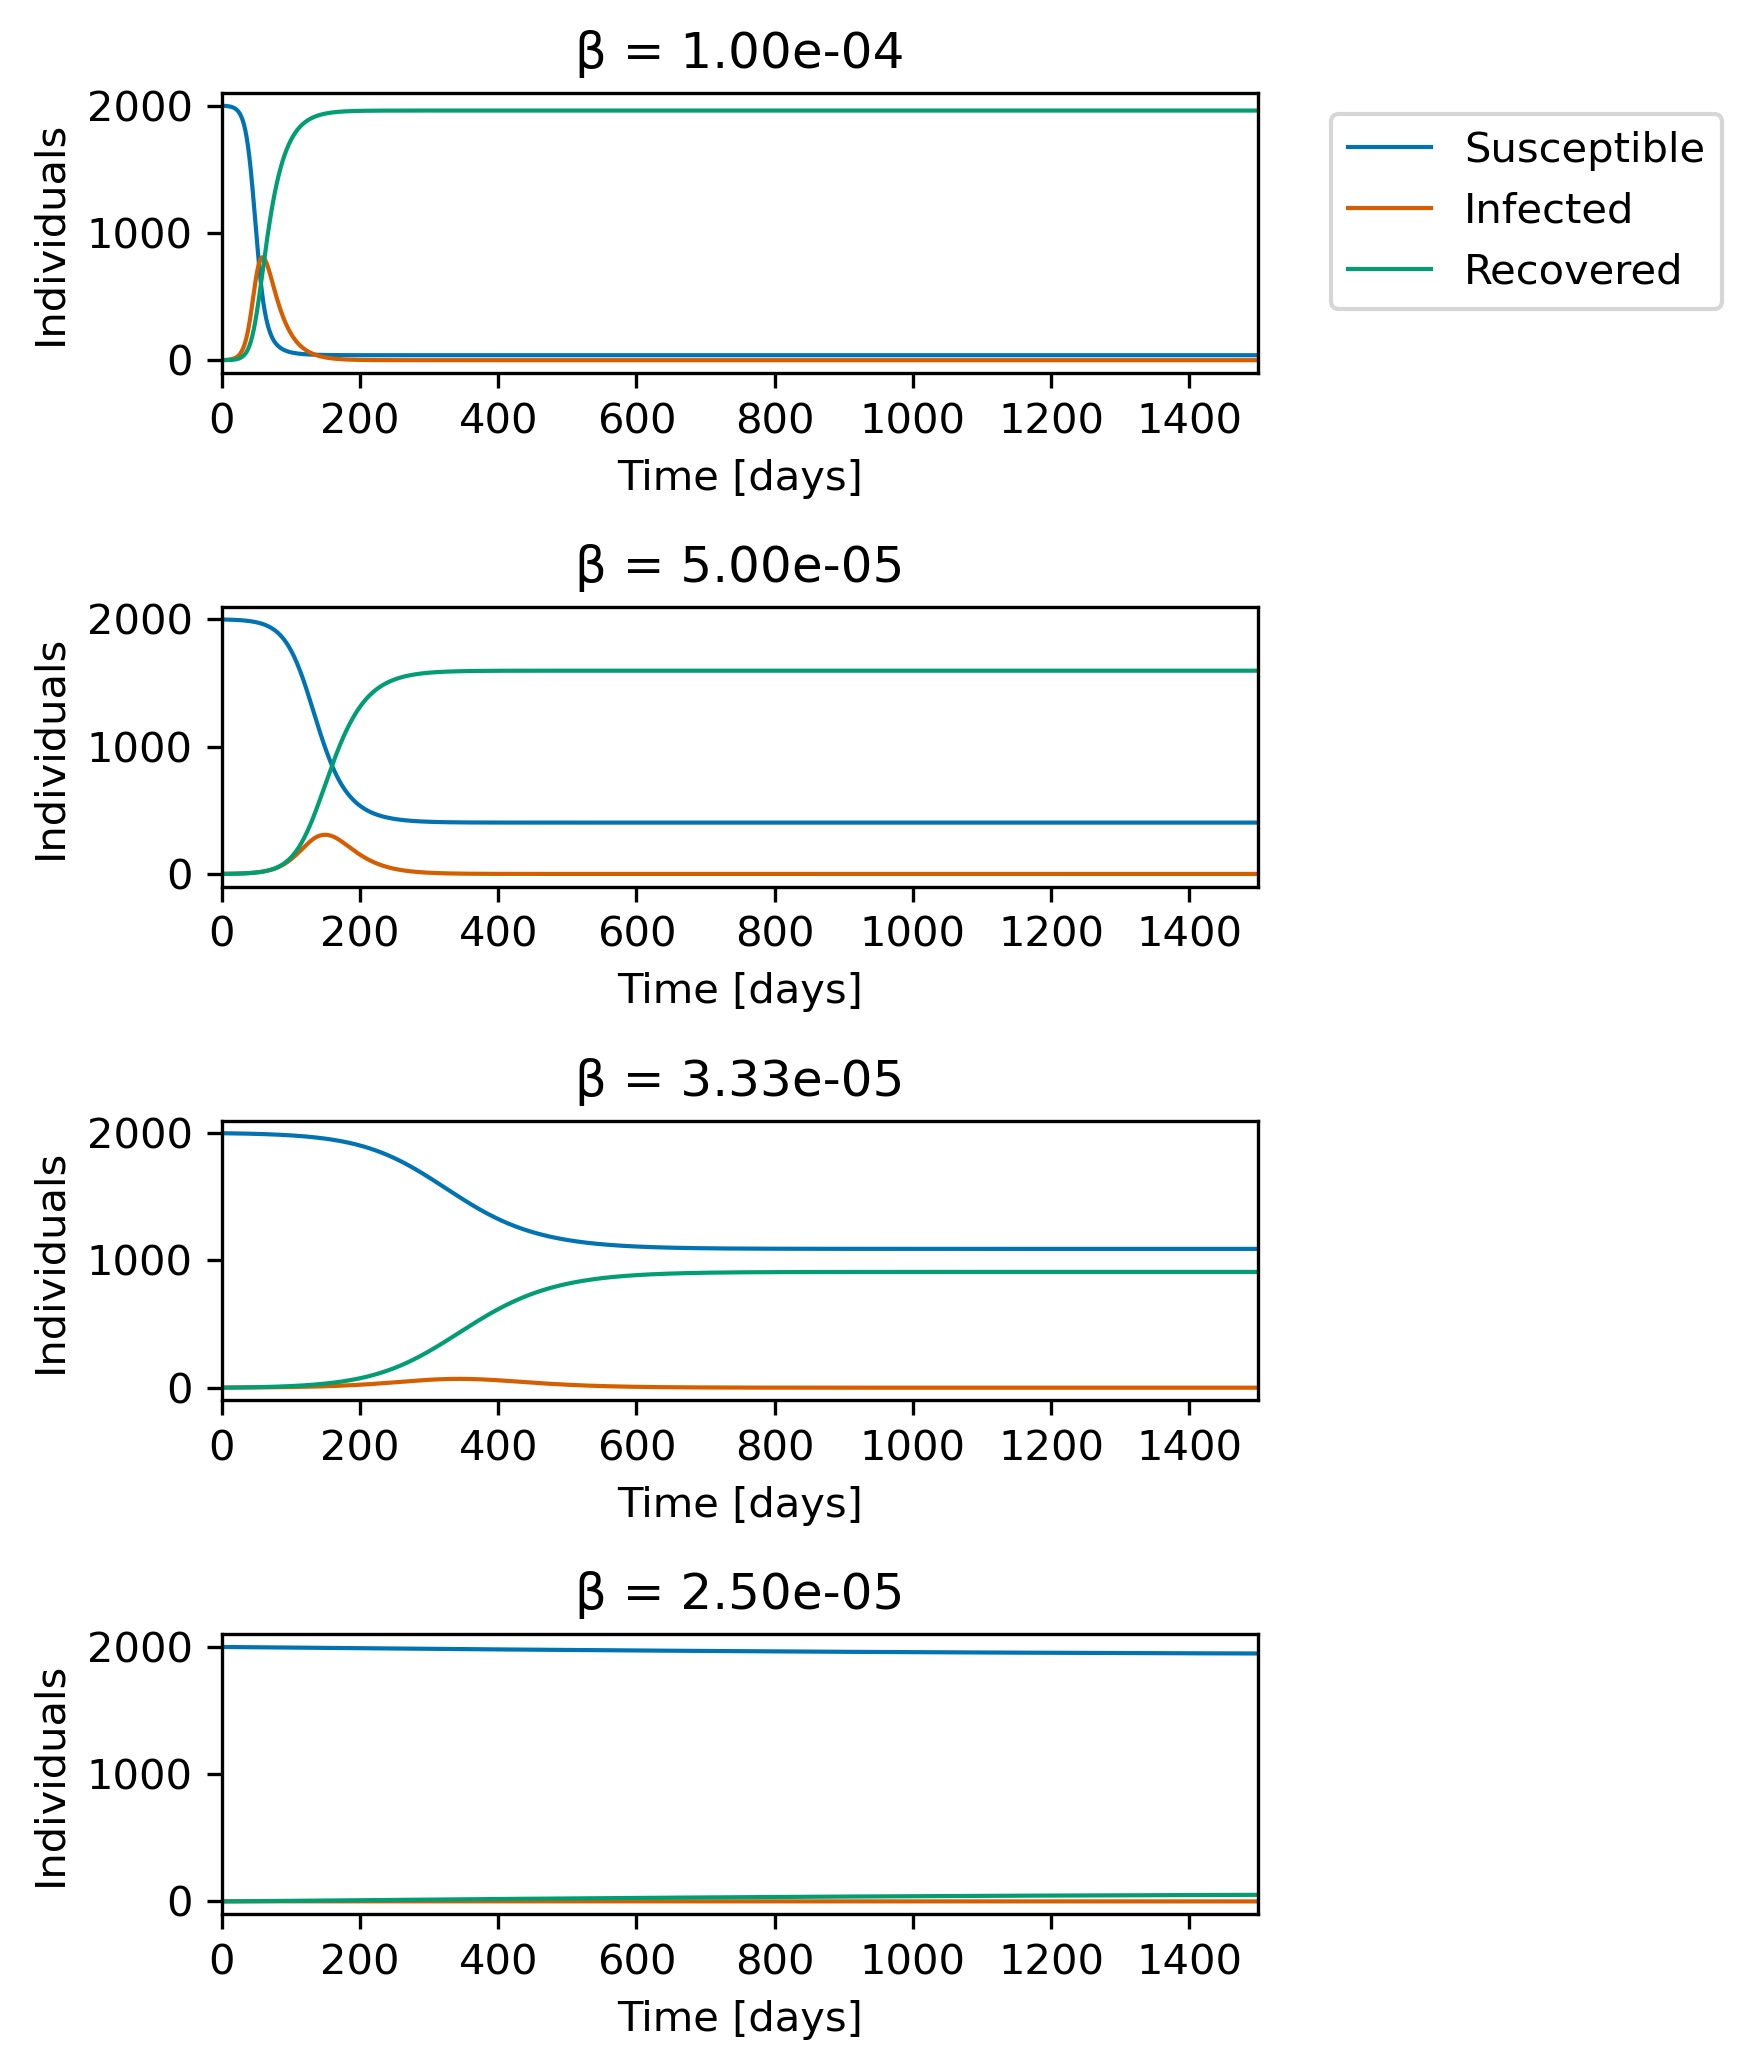

In [215]:
# run closed SIR model for varying parameters of beta and see effect on infected curves
beta_range = np.array([beta, beta /2, beta/3, beta/4])
SIR_solns = np.array([run_closed_SIR(beta = b) for b in beta_range])

fig, ax = plt.subplots(len(beta_range), 1, figsize = (6, 7), dpi = 300)

for j in np.arange(len(beta_range)):
    s, i, r = SIR_solns[j].y
    t = SIR_solns[j].t

    ax[j].plot(t, s, lw = 1, c = colors[0], label = 'Susceptible')
    ax[j].plot(t, i, lw = 1, c = colors[2], label = 'Infected')
    ax[j].plot(t, r, lw = 1, c = colors[1], label = 'Recovered')

    ax[j].set_ylabel('Individuals')
    ax[j].set_xlabel('Time [days]')
    ax[j].set_title(f'{greek_unicode[0]} = {beta_range[j]:0.2e}')
    ax[j].set_xlim(0, 1500)

    print(i[-1])

    # only one legend for each figure
    if j == 0: 
        ax[j].legend(loc = 'upper left', bbox_to_anchor = (1.05, 1))

fig.tight_layout()


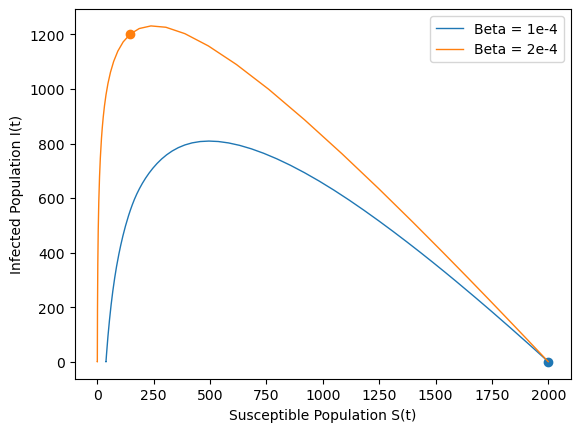

In [216]:
fig, ax = plt.subplots()

soln1 = run_closed_SIR(beta = 1e-4)
soln2 = run_closed_SIR(beta = 2e-4)

s1, i1, r1 = soln1.y
s2, i2, r2 = soln2.y

t_point = 30 # days
ax.plot(s1, i1, lw = 1, label = f'Beta = 1e-4')
ax.plot(s2, i2, lw = 1,  label = 'Beta = 2e-4')
ax.scatter(s[t_point], i[t_point])
ax.scatter(s2[t_point], i2[t_point])

ax.set_xlabel('Susceptible Population S(t)')
ax.set_ylabel('Infected Population I(t)')
ax.legend()

plt.show()

[0.01  0.005 0.001]


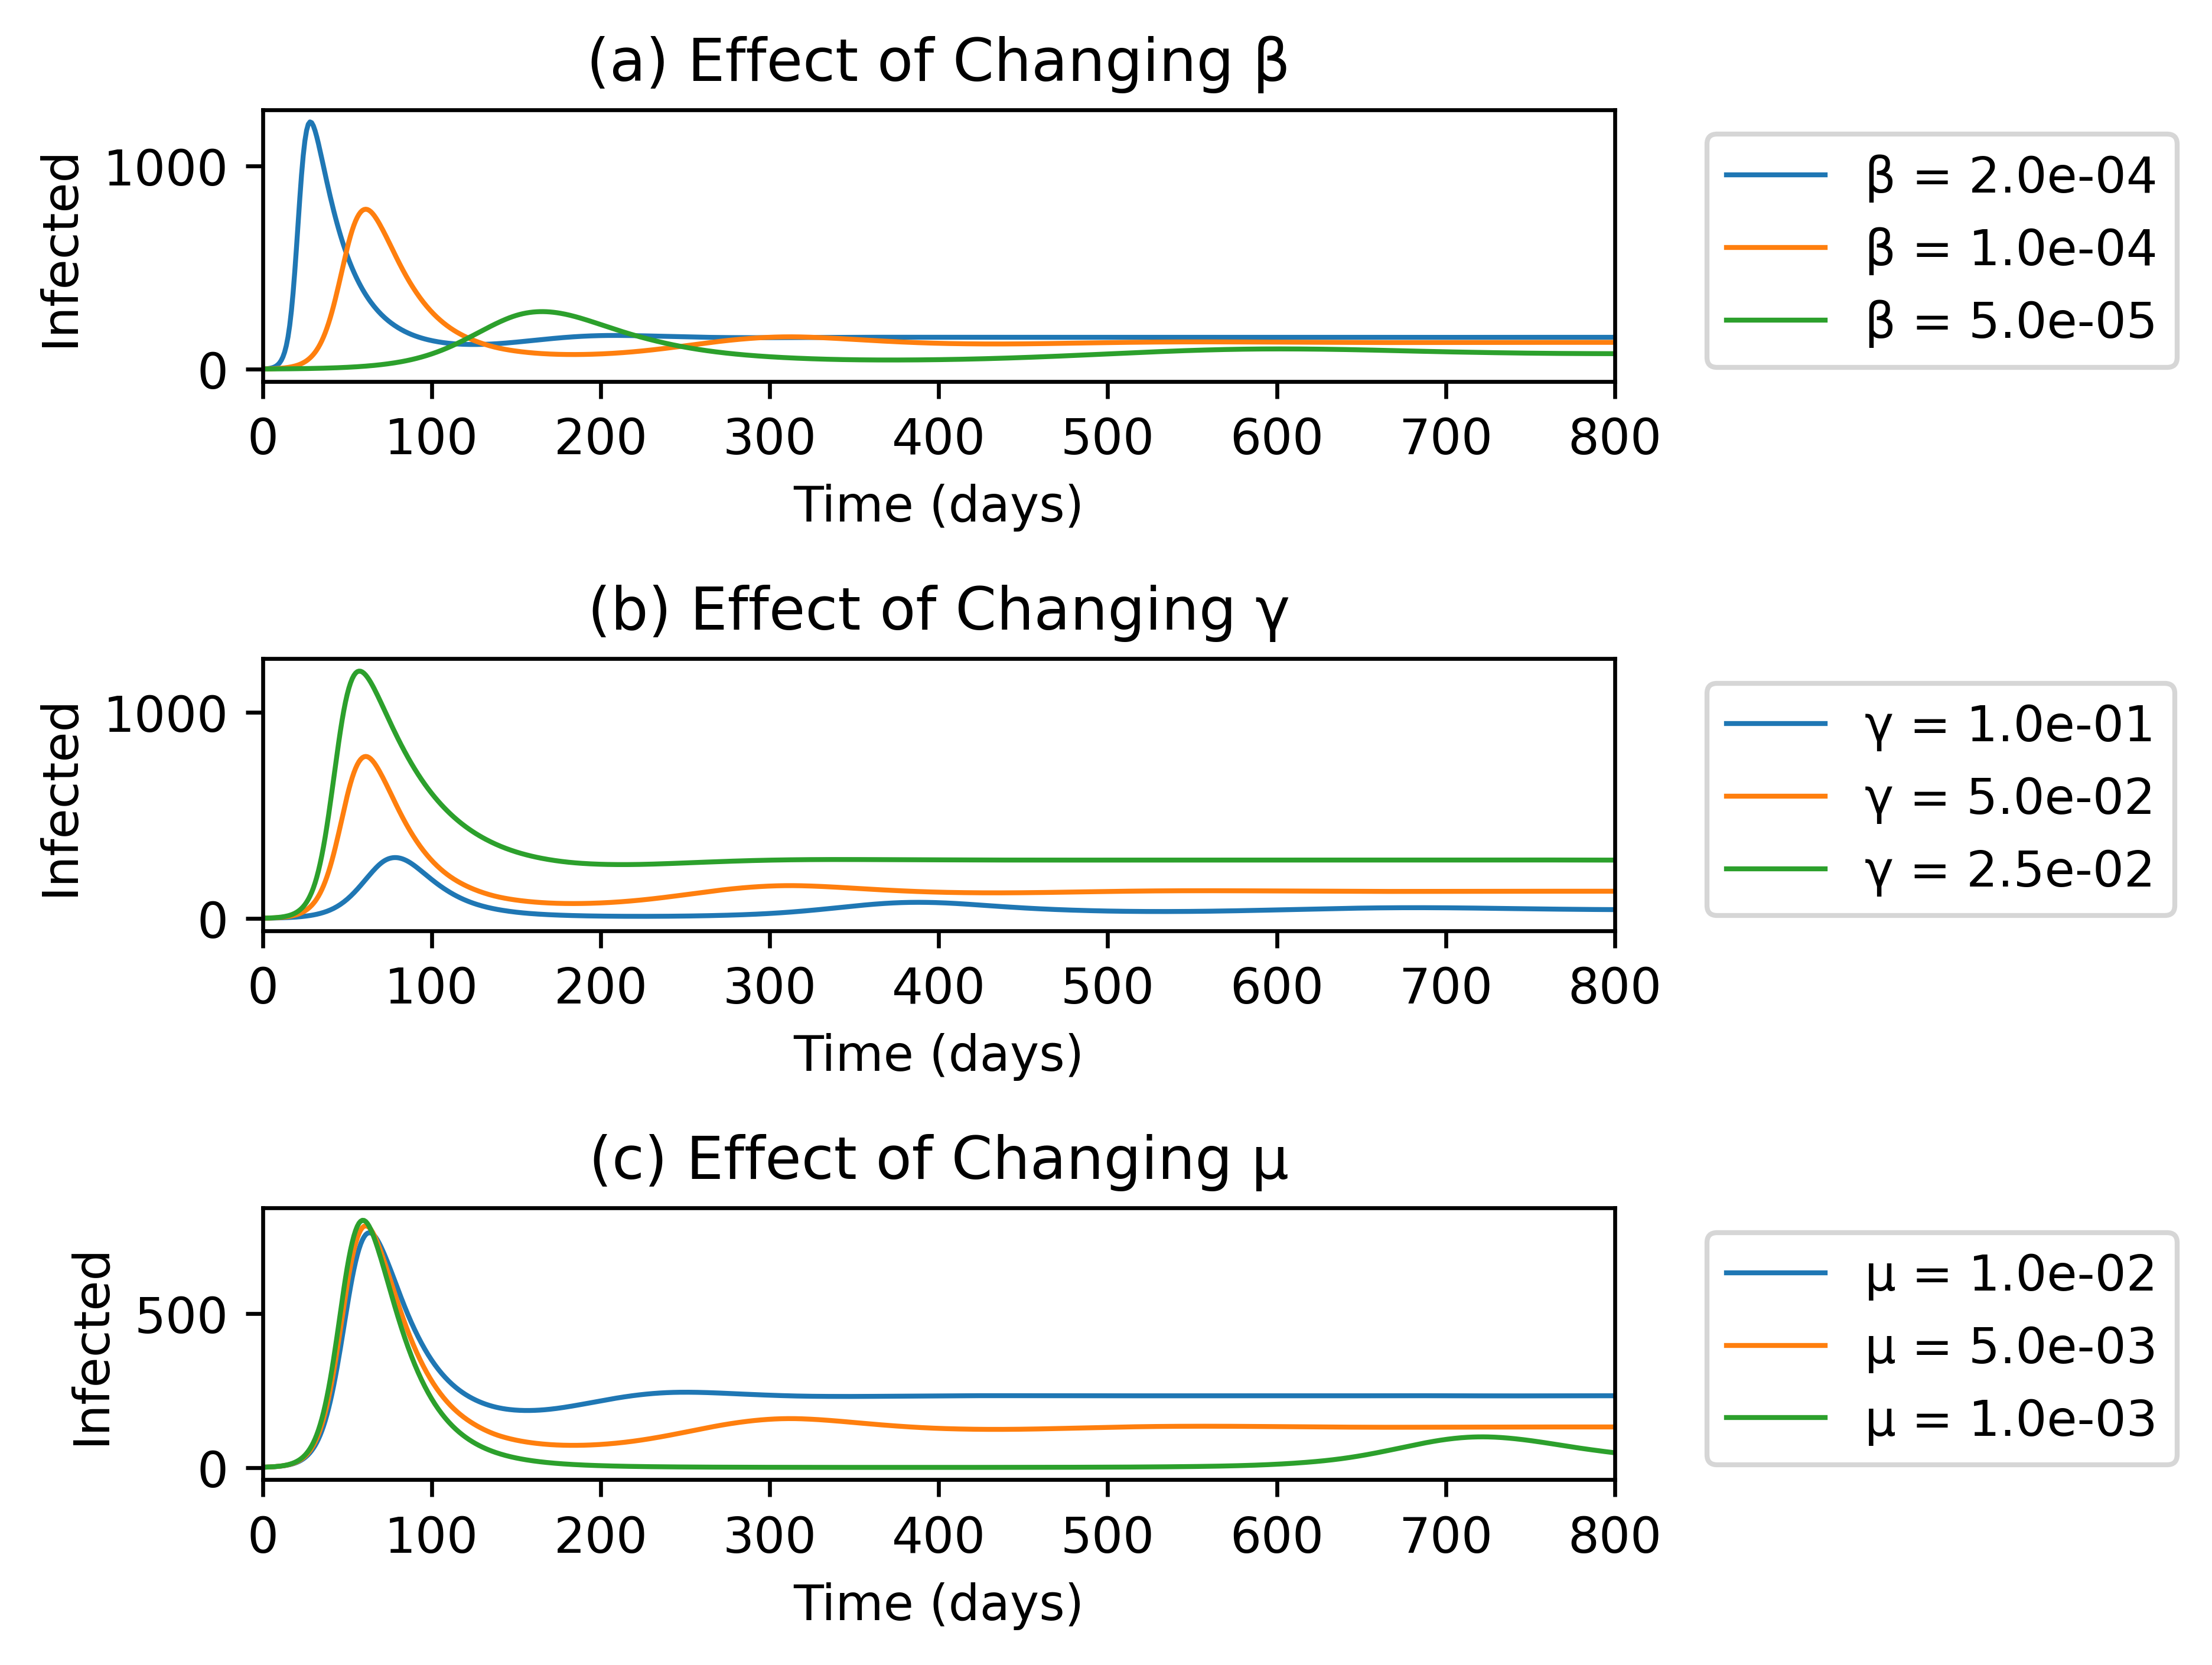

In [71]:
# we wish to create plots showing the effects of changing parameters in our open SIR model
beta_range = np.array([beta * 2, beta, beta/2])
gamma_range = np.array([gamma * 2, gamma, gamma/2])
mu_range = np.array([mu * 2, mu, mu/5])

print(mu_range)
fig, ax = plt.subplots(3, 1, dpi = 600)
# fig = plt.figure(dpi = 300)
# gs = gridspec.GridSpec(2, 2, figure = fig)

open_SIR_b = np.array([run_open_SIR(beta = b) for b in beta_range])
open_SIR_g = np.array([run_open_SIR(gamma = g) for g in gamma_range])
open_SIR_m = np.array([run_open_SIR(mu = m) for m in mu_range])

for j in np.arange(len(beta_range)):
    # ax1 = fig.add_subplot(gs[:, 0])
    s, i, r = open_SIR_b[j].y
    t = open_SIR_b[j].t
    ax[0].plot(t, i, lw = 1, label = f'{greek_unicode[0]} = {beta_range[j]:.1e}')
    ax[0].set_title(f'(a) Effect of Changing {greek_unicode[0]}')
    ax[0].set_xlim(0, 800)
    ax[0].legend(loc = 'upper left', bbox_to_anchor = (1.05, 1))

    # get max infected 
    # ax2 = fig.add_subplot(gs[0, 1])
    # ax2.plot(beta_range, [np.max(x.y[1]) for x in open_SIR_b])

    s, i, r = open_SIR_g[j].y
    ax[1].plot(t, i, lw = 1, label = f'{greek_unicode[1]} = {gamma_range[j]:.1e}')
    ax[1].set_title(f'(b) Effect of Changing {greek_unicode[1]}')
    ax[1].set_xlim(0, 800)
    ax[1].legend(loc = 'upper left', bbox_to_anchor = (1.05, 1))

    s, i, r = open_SIR_m[j].y
    ax[2].plot(t, i, lw = 1, label = f'{greek_unicode[2]} = {mu_range[j]:.1e}')
    ax[2].set_title(f'(c) Effect of Changing {greek_unicode[2]}')
    ax[2].set_xlim(0, 800)
    ax[2].legend(loc = 'upper left', bbox_to_anchor = (1.05, 1))

    ax[j].set_ylabel('Infected')
    ax[j].set_xlabel('Time (days)')

fig.tight_layout()

# compute peak out break for every population


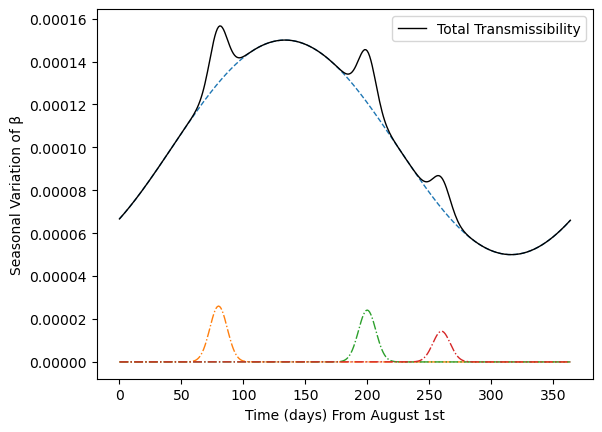

In [ ]:
# create code with sinusoidal variation and some gaussian peaks
t = np.arange(0, 365, 1)

b0, b1 = 1e-4, 5e-5
seasonal_beta = b0 + b1*np.cos(2*np.pi * t / 365 - 40)

gaussian = lambda A, t, t0, w: A * np.exp(-0.5 * ((t - t0)/w)**2)

fig, ax = plt.subplots()
fall, winter, spring = gaussian(seasonal_beta[80]/5, t, 80, 7), gaussian(seasonal_beta[200]/5, t, 200, 7), gaussian(seasonal_beta[260]/5, t, 260, 7)
ax.plot(t, seasonal_beta, lw = 1, ls = '--')
ax.plot(t, fall, lw = 1, ls = '-.')
ax.plot(t, winter, lw = 1, ls = '-.')
ax.plot(t, spring, lw = 1, ls = '-.')
# ax.axhline(t, b0, lw = 1, c = "#7C7C7C", ls = '--')

ax.plot(t, seasonal_beta + fall + winter + spring, lw = 1, c = 'k', label = 'Total Transmissibility')
ax.set_xlabel('Time (days) From August 1st')
ax.set_ylabel(f'Seasonal Variation of {greek_unicode[0]}')
ax.legend()


Endemic Infected = 130.03894956680753
Endemic Infected = 127.3920334588632
Endemic Infected = 123.1811909569731
σ = 0.5, 264
σ = 0.2, 280
σ = 0.1, 331


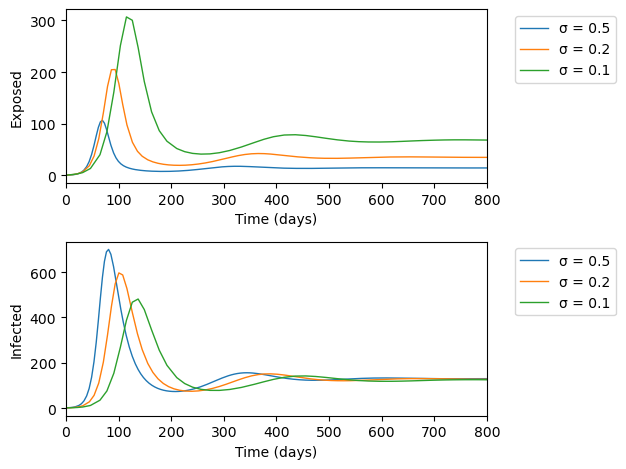

In [120]:
# %matplotlib inline
sigma = 1/5 # exposed duration of 5 days
sigma_range = np.array([sigma * 2.5, sigma, sigma / 2])

open_SEIR = np.array([run_open_SEIR_model(sigma = s, dt = 0.1) for s in sigma_range])
fig, ax = plt.subplots(2, 1)

for j in np.arange(len(sigma_range)):
    s, e, i, r = open_SEIR[j].y
    t = open_SEIR[j].t

    ax[0].plot(t, e, lw = 1, label = f'{greek_unicode[3]} = {sigma_range[j]:.1}')
    ax[0].set_xlabel('Time (days)')
    ax[0].set_ylabel('Exposed')
    ax[0].set_xlim(0, 800)
    ax[0].legend(loc = 'upper left', bbox_to_anchor = (1.05, 1))

    ax[1].plot(t, i, lw = 1, label = f'{greek_unicode[3]} = {sigma_range[j]:.1}')
    ax[1].set_xlabel('Time (days)')
    ax[1].set_ylabel('Infected')
    ax[1].set_xlim(0, 800)
    ax[1].legend(loc = 'upper left', bbox_to_anchor = (1.05, 1))

    print(f'Endemic Infected = {i[-1]}')
    # print(f'{greek_unicode[3]} = {sigma_range[j]}')

fig.tight_layout()

# differences in initial and subsequent peaks; to find duration btw outbreaks
print(f'{greek_unicode[3]} = {sigma_range[0]}, {334 - 70}') # blue
print(f'{greek_unicode[3]} = {sigma_range[1]}, {375 - 95}') # orange
print(f'{greek_unicode[3]} = {sigma_range[2]}, {473 - 142}') # green

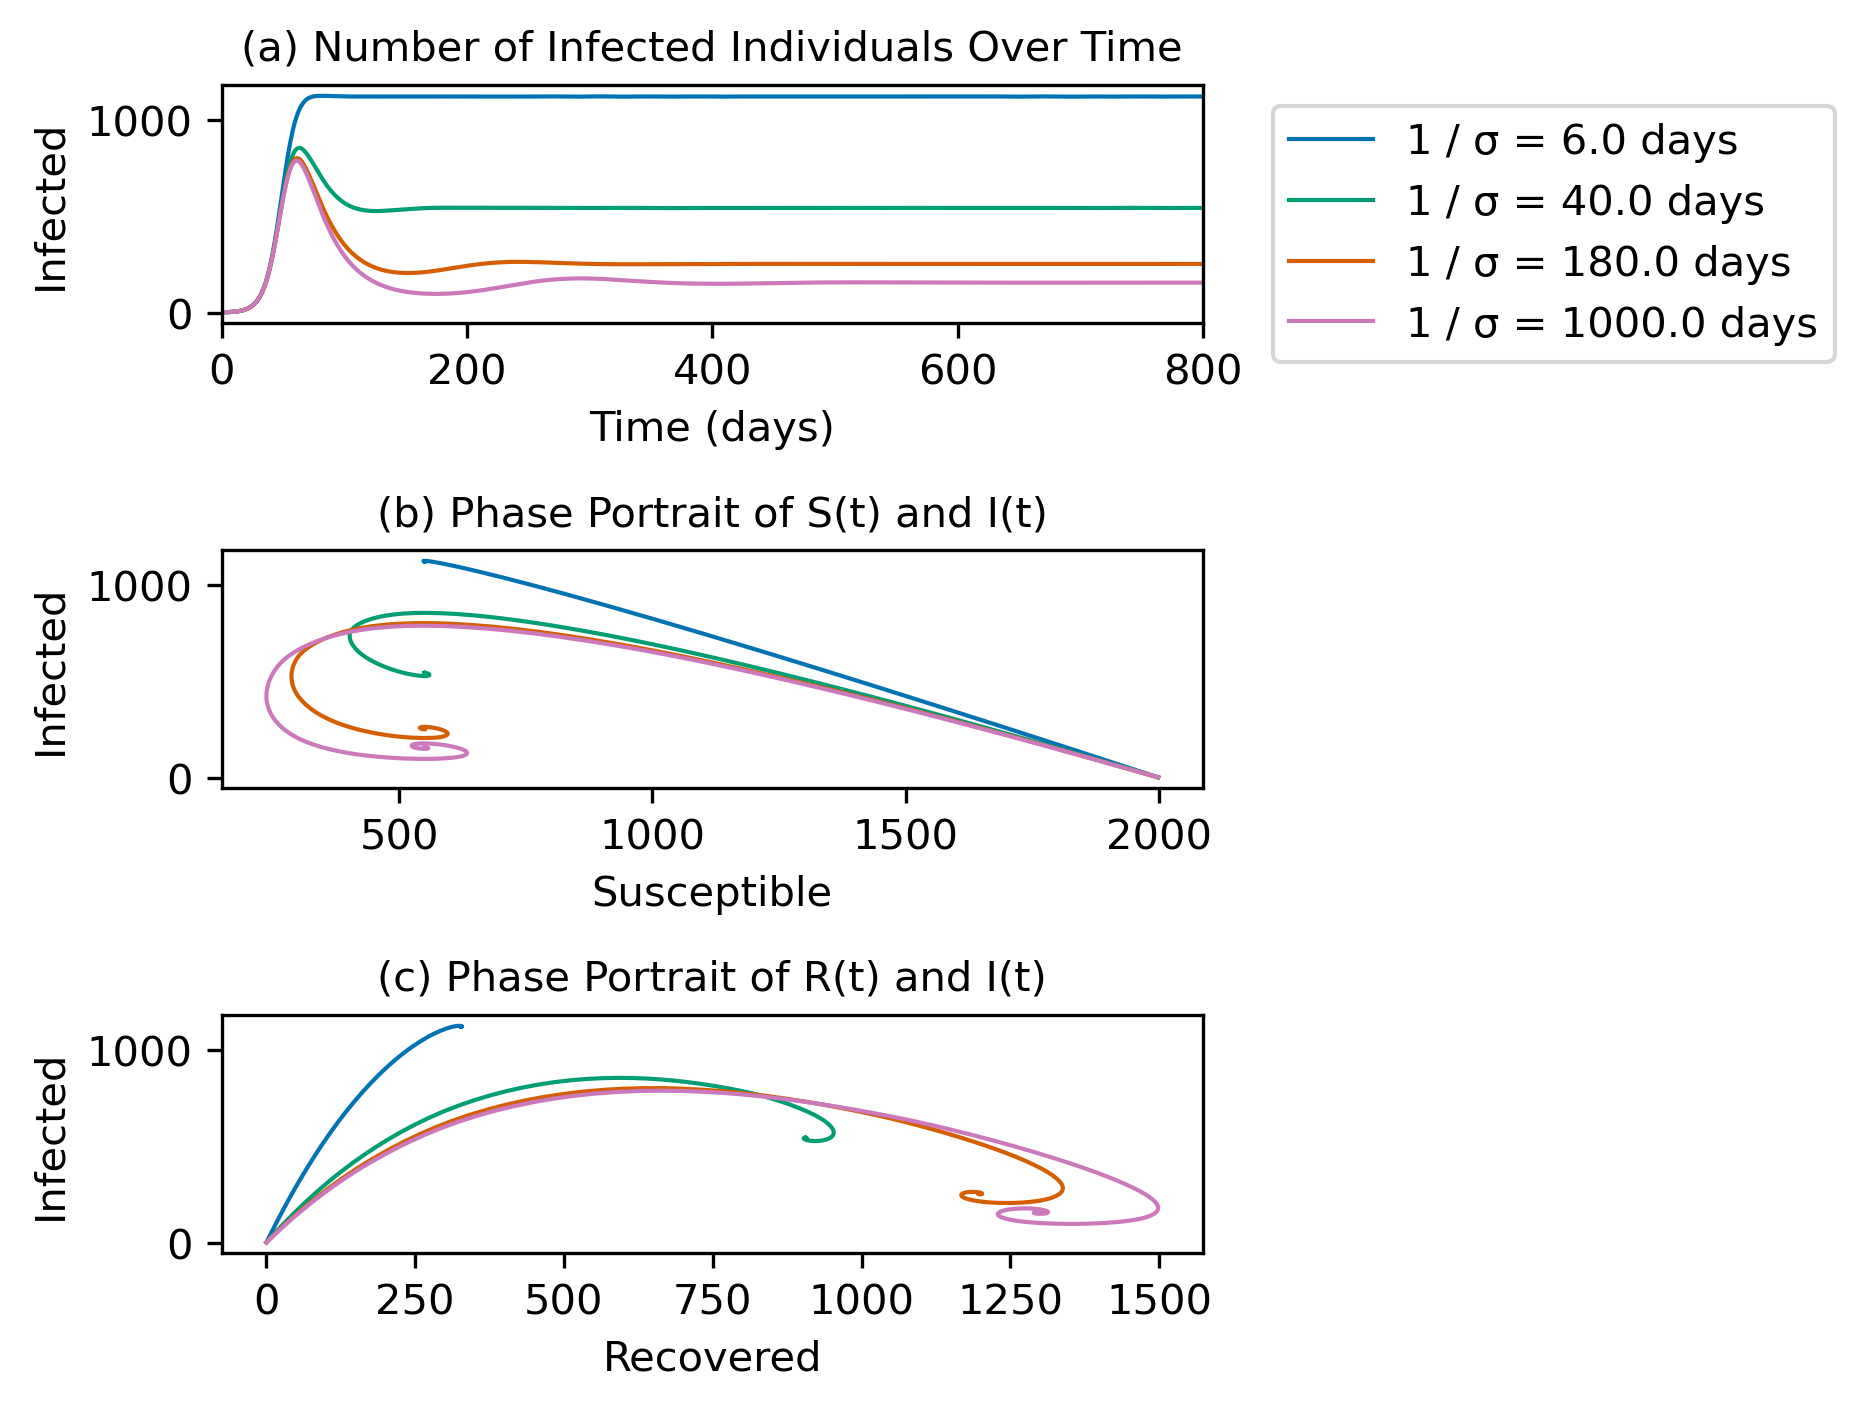

In [188]:
# SIR model with temporary immunity
# %matplotlib inline
sigma_range = np.array([1/6.0, 1/ 40.0, 1.0/180, 1.0/1000])
immunity_duration = 1/sigma_range

solns_temp_immunity = np.array([run_open_SIR_temp_immunity(beta = 1e-4, sigma = s) for s in sigma_range])

fig, ax = plt.subplots(3, 1, dpi = 300)
for j, soln in enumerate(solns_temp_immunity):
    s, i, r = soln.y
    t = soln.t

    ax[0].plot(t, i, lw = 1, c = colors[j], label = f'1 / {greek_unicode[3]} = {immunity_duration[j]} days')
    ax[0].set_xlabel('Time (days)')
    ax[0].set_ylabel('Infected')
    ax[0].set_title('(a) Number of Infected Individuals Over Time', fontsize = 10)
    ax[0].set_xlim(0, 800)

    ax[0].legend(loc = 'upper left', bbox_to_anchor = (1.05, 1))  
    # ax[0].legend() 

    ax[1].plot(s, i, lw = 1, c = colors[j])
    ax[1].set_xlabel('Susceptible')
    ax[1].set_ylabel('Infected')
    ax[1].set_title('(b) Phase Portrait of S(t) and I(t)', fontsize = 10)

    ax[2].plot(r, i, lw = 1, c = colors[j])
    ax[2].set_xlabel('Recovered')
    ax[2].set_ylabel('Infected')
    ax[2].set_title('(c) Phase Portrait of R(t) and I(t)', fontsize = 10)

fig.tight_layout()


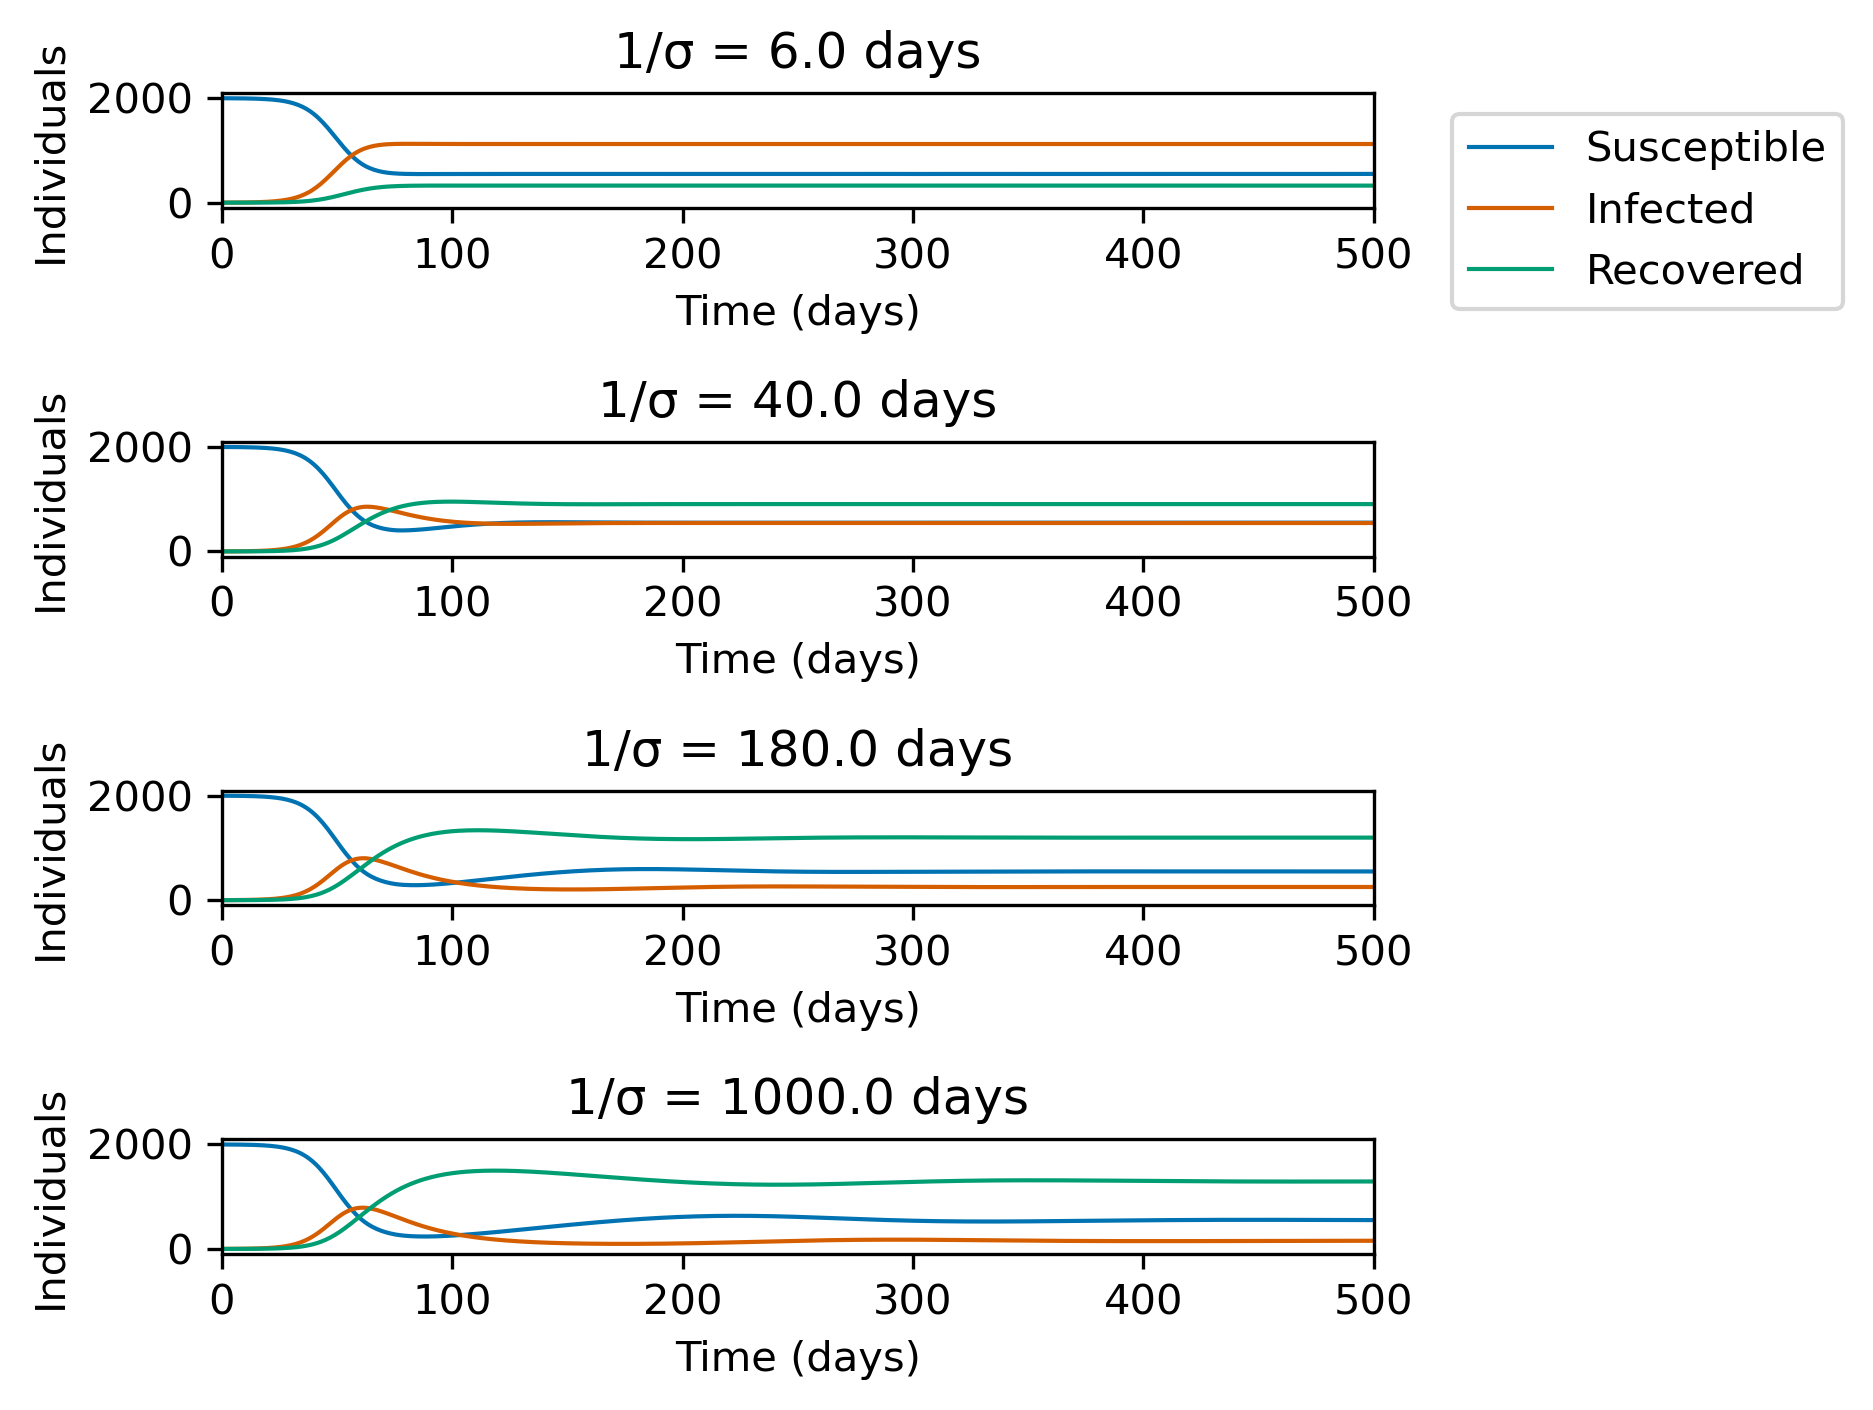

In [189]:
# continue some visualizations
fig, ax = plt.subplots(len(sigma_range), 1, dpi = 300)

for j, soln in enumerate(solns_temp_immunity):
    s, i, r = soln.y
    t = soln.t

    ax[j].plot(t, s, lw = 1, color = colors[0], label = 'Susceptible')
    ax[j].plot(t, i, lw = 1, color = colors[2], label = 'Infected')
    ax[j].plot(t, r, lw = 1, color = colors[1], label = 'Recovered')

    ax[j].set_title(f'1/{greek_unicode[3]} = {immunity_duration[j]} days')

    ax[j].set_ylabel('Individuals')
    ax[j].set_xlabel('Time (days)')
    ax[j].set_xlim(0, 500)

    ax[0].legend(loc = 'upper left', bbox_to_anchor = (1.05, 1)) # specifies legend location

fig.tight_layout()

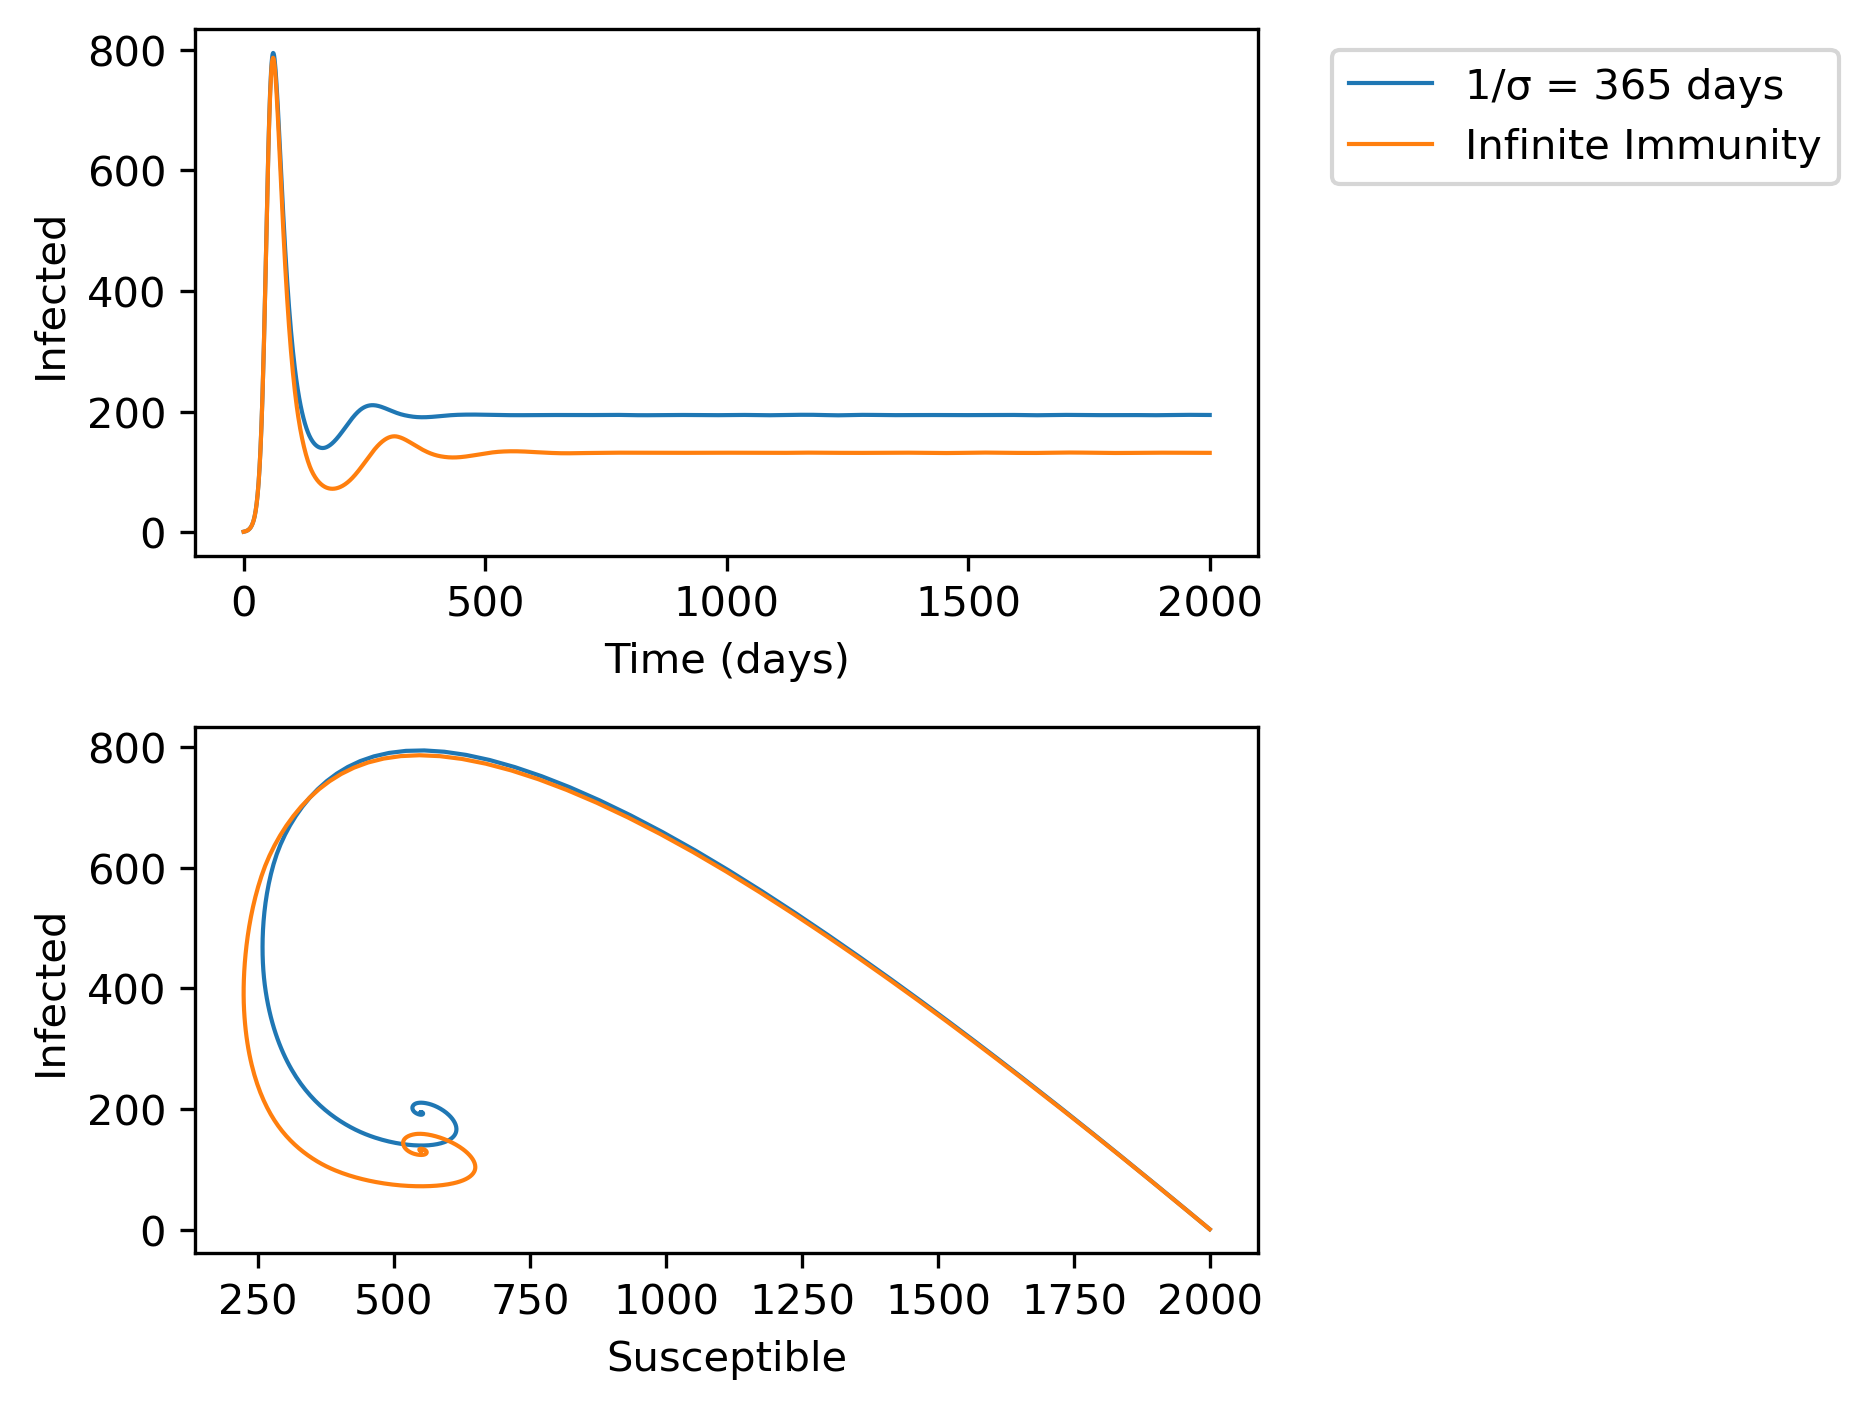

In [184]:
# part d of same problem, essentially comparing open SIR model (infinite immunity) with finite immunity
soln_temp_immunity = run_open_SIR_temp_immunity(sigma = 1/365.0)
soln_open_SIR = run_open_SIR()

s1, i1, r1 = soln_temp_immunity.y
s2, i2, r2 = soln_open_SIR.y
t = soln_temp_immunity.t

fig, ax = plt.subplots(2, 1, dpi = 300)

ax[0].plot(t, i1, lw = 1, label = f'1/{greek_unicode[3]} = 365 days')
ax[0].plot(t, i2, lw = 1, label = f'Infinite Immunity')
ax[0].legend(loc = 'upper left', bbox_to_anchor = (1.05, 1))
ax[0].set_xlabel('Time (days)')
ax[0].set_ylabel('Infected')

ax[1].plot(s1, i1, lw = 1)
ax[1].plot(s2, i2, lw = 1)
ax[1].set_xlabel('Susceptible')
ax[1].set_ylabel('Infected')

fig.tight_layout()

δ = 0.3, Endemic 1.988399476108237e-07
δ = 0.1, Endemic 3.6353389177312315e-09
δ = 0.05, Endemic 0.10094609475950242
δ = 0.001, Endemic 106.43283618251115


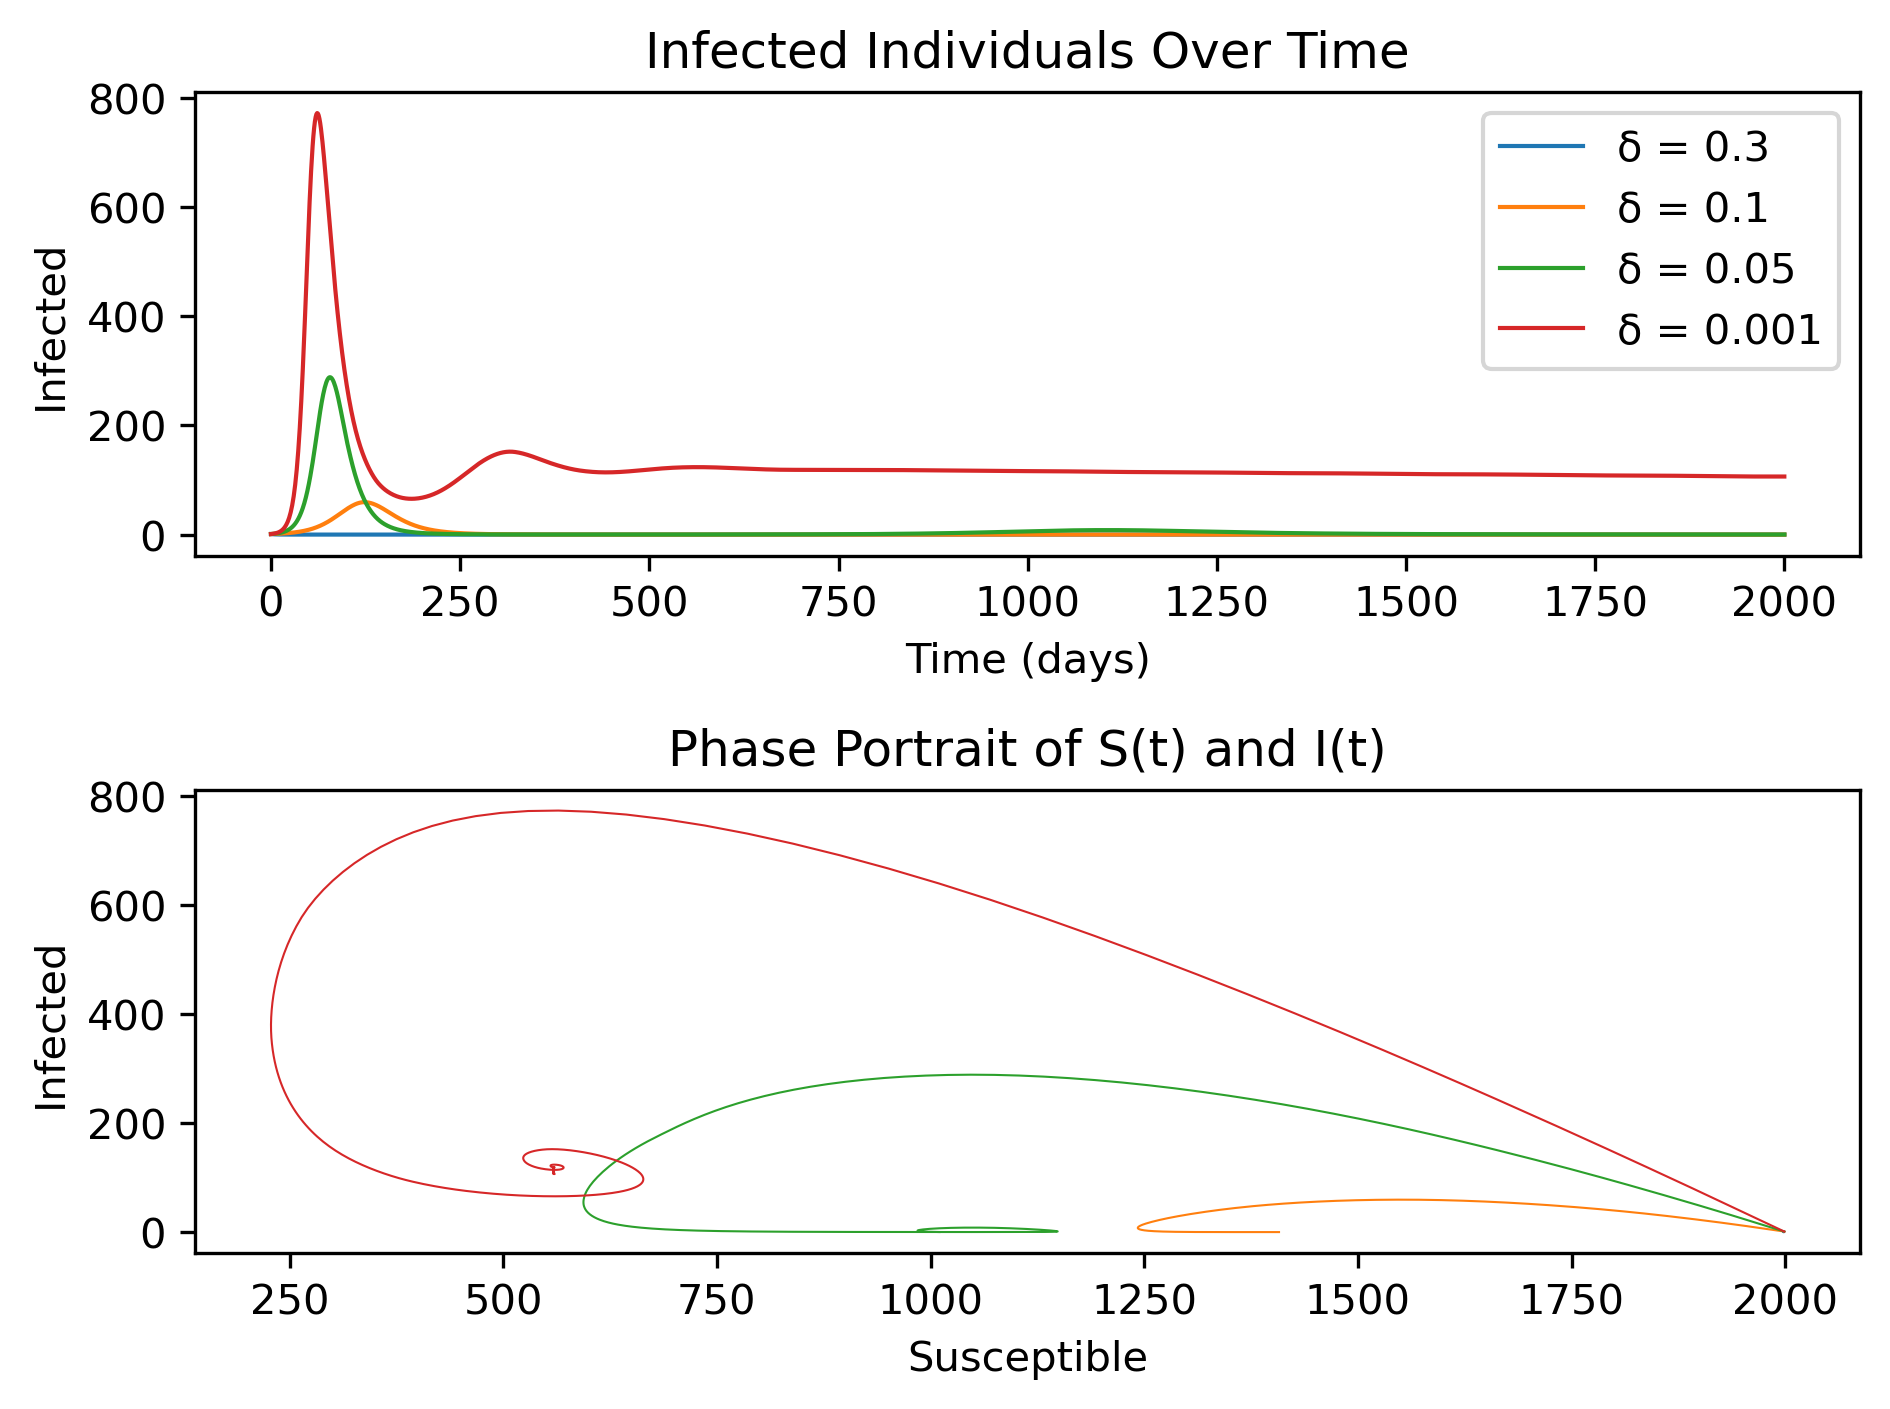

In [211]:
delta = 1e-4
delta_range = np.array([0.3, 0.1, 0.05, 0.001])
solns_semi_fatal = np.array([run_open_SIR_semifatal(delta = d, span = 2000) for d in delta_range])

fig, ax = plt.subplots(2, 1, dpi = 300)

for j, soln in enumerate(solns_semi_fatal):
    s, i, r = soln.y
    t = soln.t

    ax[0].plot(t, i, lw = 1, label = f'{greek_unicode[-1]} = {delta_range[j]}')
    ax[0].set_xlabel('Time (days)')
    ax[0].set_ylabel('Infected')
    ax[0].set_title('Infected Individuals Over Time')
    ax[0].legend()

    ax[1].plot(s, i, lw = 0.5)
    ax[1].set_ylabel('Infected')
    ax[1].set_xlabel('Susceptible')
    ax[1].set_title('Phase Portrait of S(t) and I(t)')

    print(f'{greek_unicode[-1]} = {delta_range[j]}, Endemic {i[-1]}')

fig.tight_layout()